In [11]:
#import sys
#!{sys.executable} -m pip install graphviz --user
#from graphviz import Source
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
plt.rcParams["figure.figsize"] = (12, 9)

# RNNS

todo: https://www.youtube.com/watch?v=LHXXI4-IEns

![nn cell](https://www.htw-dresden.de/~guhr/img/nn-cell.svg)

![single rnn cell](https://www.htw-dresden.de/~guhr/img/rnn-cell.svg)

![rnn unrolled in time](https://www.htw-dresden.de/~guhr/img/rnn-unrolled.svg)

## Vanishing & Exploding Gradient Problem

By gradient we mean the gradient of the loss function with respect to the weigts of the neural network. As you already learned, this gradient is calulated using backpropagation. 

* What you should know:
    * [Backpropagation](https://www.youtube.com/watch?v=tIeHLnjs5U8)
  
* Video for this topic:
    * [Vanishing & Exploding Gradient explained](https://www.youtube.com/watch?v=qO_NLVjD6zE)

### What happens during backpropagation?

Lets start with the loss function. In case we use a MSE loss (or cost) function it is calculated this way:

$ Loss = (a_{L} -y)^2 $

Where $ y $ denotes the desired output of the network and $a_{L}$ is the activation of the last neuron.


$ a_{L} = \sigma( w_{L}a_{L-1}+b_{L})$


Let's define $ in $ as the input of our network and 
write down a 5 layer network single neuron network:


$ a_{1} = \sigma( w_{1} in +b_{1}) $ 

$ a_{2} = \sigma( w_{2}a_{1}+b_{2}) $ 

$ a_{3} = \sigma( w_{3}a_{2}+b_{3}) $ 

$ a_{4} = \sigma( w_{4}a_{3}+b_{4}) $ 

$ a_{5} = \sigma( w_{5}a_{4}+b_{5}) $ 



$ Loss = (a_{5} -y)^2 $

With the help of the backpropagation algorithm we can ajust the weights. As you know the backpropagation uses derivatives to calculate the weight changes. How does these derivatives look like?

### Lets look at the derivative of our activation function

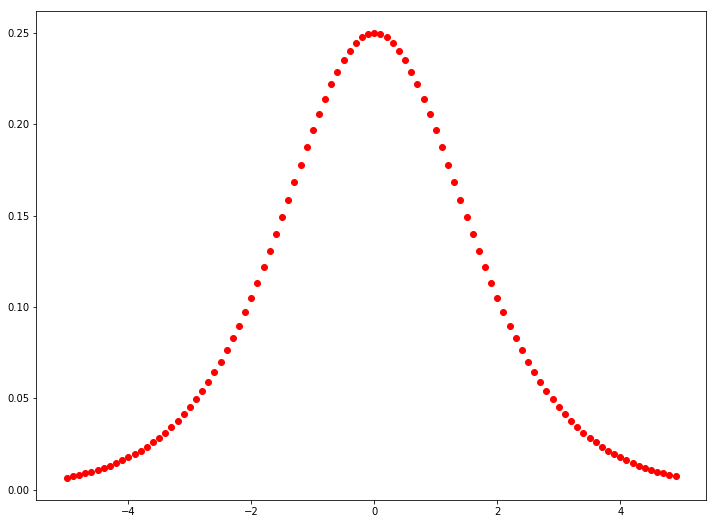

In [12]:
sigmoid = nn.Sigmoid() # try this for Tanh, ReLu

for i in range(-50,50):
    data = torch.tensor([i/10],requires_grad=True)
    calc = sigmoid(data)
    calc.backward()    
    plt.plot(i/10,data.grad[0], 'ro')    

plt.show()

The maximum of the derivative of the sigmoid function is 0.25 at $x = 0$ and much smaller for all other values. 


### Let's implement a small network...
so we can see whats going on here. We use the 5 layer single neuron network that we defined earlier. 

We want our network to negate a number. We put in a $1$ and it should return a $-1$. For simplicity we do not use biases in this tiny example.

In [3]:
weight_tensor = torch.randn((1, 5), requires_grad=True)
weight = weight_tensor[0] 
net_input = 1 
y = net_output = -1
weight

tensor([ 0.3533, -0.1390, -0.2680, -0.1207,  0.0530], grad_fn=<SelectBackward>)

In [4]:
layer1 = sigmoid(weight[0] * net_input) 
layer2 = sigmoid(weight[1] * layer1) 
layer3 = sigmoid(weight[2] * layer2) 
layer4 = sigmoid(weight[3] * layer3) 
layer5 = sigmoid(weight[4] * layer4) 
loss= (layer5 - y)**2

loss.backward()

In [5]:
# we can obtian the gradient of the weights with:
weight_tensor.grad

tensor([[-6.7587e-07,  1.1782e-05, -1.4380e-04,  4.6685e-03,  3.6592e-01]])

From right to left, we can see how the weight delta gets smaller. Since they are a product of numbers smaller than one, they can only get even smaller.

In [37]:
learning_rate = 0.01
weight_neuron_one = weight_tensor[0][0].item()
weight_grad_neuron_one =  weight_tensor.grad[0][0].item()

weight_update = weight_grad_neuron_one * learning_rate

print("wieght update:\n")
print("weight delta \t\t* learning rate \t= update step")
print(f"{weight_grad_neuron_one:.16f} \t* {learning_rate} \t\t\t= {weight_update:.16f}")
print("")
print(f"old weight:{weight_neuron_one}")
print(f"new weight:{weight_neuron_one - weight_update}")

wieght update:

weight delta 		* learning rate 	= update step
-0.0000006758703535 	* 0.01 			= -0.0000000067587035

old weight:0.35331955552101135
new weight:0.3533195622797149


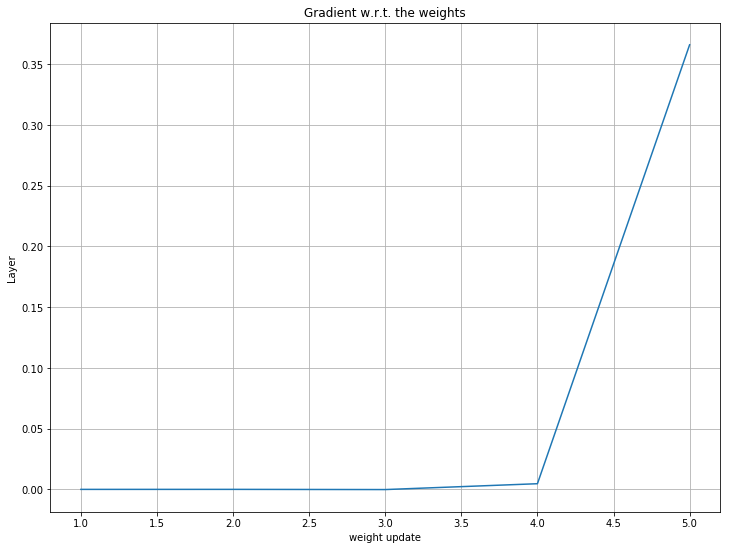

In [13]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5],weight_tensor.grad[0].numpy())

ax.set(xlabel='weight update', ylabel='Layer',
       title='Gradient w.r.t. the weights')
ax.grid()

plt.show()

As you can the gradient of our toy network quickly gets close to zero. That's why this problem is called vanishing gradient problem. Since the updates to the weights are so small, they also don't help to redcue the loss.

The opposite of this is called the exploding gradient, this happens if weights or activations 

In [9]:
# Todo: https://medium.com/dair-ai/building-rnns-is-fun-with-pytorch-and-google-colab-3903ea9a3a79